In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [186]:
import AD_Py as AD_Py
import importlib
importlib.reload(AD_Py)
# mytree = AD_Py.AD_Py(treefile = "Data/69species/test.tre")
mytree = AD_Py.AD_Py(treefile = "Data/69species/astral.FAA.trim50genes.final.tre")

In [187]:
outgroup = ["Uronema sp", "Monomastix opisthostigma", "Pyramimonas parkeae", "Nephroselmis pyriformis"]
mytree.set_outgroup(outgroup)

In [188]:
mytree.add_tree_collection(treefile = "Data/69species/tc.tre",namefile="Data/69species/names.txt")

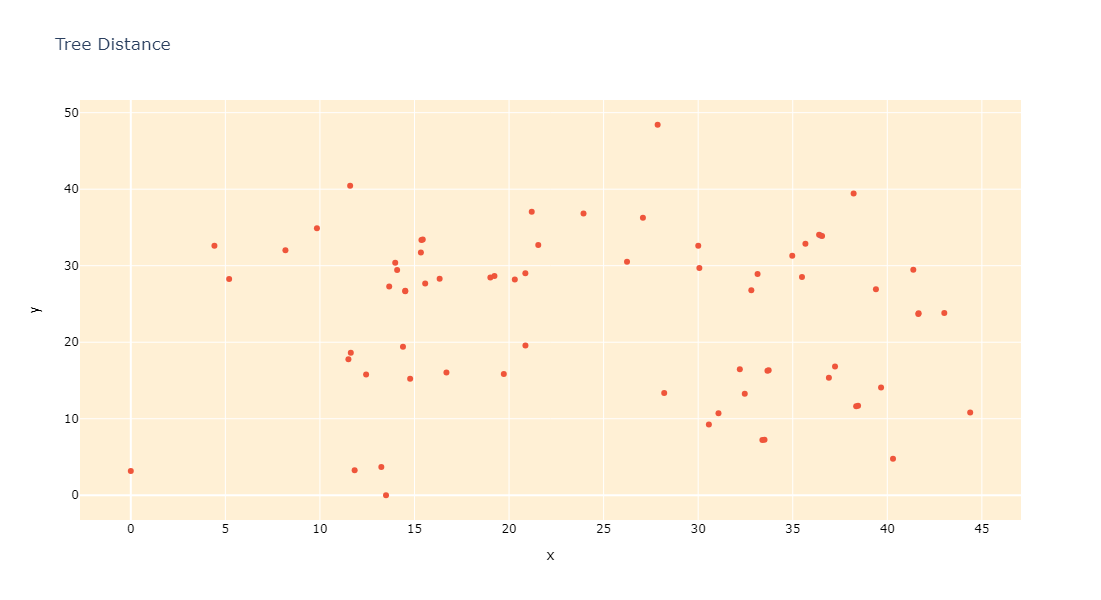

In [189]:
mytree.tree_distance()

In [ ]:
# Testing
print(mytree.x_coor[0])
print(mytree.y_coor[0])
print(mytree.x_coor[36])
print(mytree.y_coor[36])

In [130]:
import importlib
importlib.reload(AD_Py)

rt_canvas = mytree.reference_tree()
rt_canvas

rtCanvas(height=2080, width=1100)

In [131]:
import importlib
importlib.reload(AD_Py)

# Default
# parameter_from_individual_ad = True
# differentiate_inexact_match = True
# subtree_independent = False
# ignore_independent_leaf = True
# show_block_proportional = True
tc_canvas = mytree.AD(view='Individual',scale=1.0,sort='rf_distance',context_level = 2,max_ad=10,show_tree_name=True)


tcCanvas(height=406, width=1100)

In [11]:
import tcCanvas as tcCanvas
import importlib
importlib.reload(tcCanvas)

# Default
# parameter_from_individual_ad = True
# differentiate_inexact_match = True
# subtree_independent = False
# ignore_independent_leaf = True
# show_block_proportional = True
cluster_canvas = mytree.AD(view='Cluster',scale=1.0,context_level = 2)
cluster_canvas

tcCanvas(height=210, width=1100)

In [25]:
for topology in cluster_canvas.topology_list:
    print(topology.ad_string)

([inexact]A,Individual_blank_block);
([exact]A,Individual_blank_block);


In [30]:
for subtree in tc_canvas.subtree_list:
    print(subtree.label)
    print(subtree.root.corr[0])

A
<Node object at 0x1dc6c89c790: '6' (None)>


In [23]:
import importlib
importlib.reload(AD_Py)
for index,ad_tree in enumerate(tc_canvas.ad_list):
    print("ad_tree :" + str(index+1))
    ad_tree.plot_tree()

ad_tree :1
Root <Node object at 0x1b8860b7990: 'None' (None)>


AttributeError: 'AD_Block' object has no attribute 'taxa_count'

In [14]:
import dendropy
newick_str = ""

for index,ad_tree in enumerate(tc_canvas.ad_list):
    print("ad_tree :" + str(index+1))
    newick_str = ad_tree.ad_to_string(ignore_independant_leaf=True)
    print(newick_str)
    # tree = dendropy.Tree.get(data=newick_str, schema="newick",taxon_namespace=taxon_namespace)
    # dendropy_tree_list.append(tree)

    
# tree1 = dendropy_tree_list[3]
# # tree1.print_plot()
# tree2 = dendropy_tree_list[4]

# for leaf in tree1.leaf_node_iter():
#     leaf.taxon = None
# for leaf in tree2.leaf_node_iter():
#     leaf.taxon = None

# rf_distance = dendropy.calculate.treecompare.symmetric_difference(tree1, tree2)
# print(rf_distance)



ad_tree :1
(A[(B_INDEPENDENT,(B,(B_INDEPENDENT,Individual_blank_block)Internal Node)Internal Node);],Individual_blank_block);
ad_tree :2
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :3
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :4
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :5
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :6
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :7
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :8
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :9
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);
ad_tree :10
(A[(B,(B_INDEPENDENT,Individual_blank_block)Internal Node);],Individual_blank_block);


In [87]:
from ete3 import Tree, TreeStyle, TextFace

tree1 = ete3_tree_list[0]
tree2 = ete3_tree_list[4]
rf_distance = tree1.robinson_foulds(tree2)[0]

print("RF distance:", rf_distance)

ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True

# 在Jupyter Notebook中显示树
# tree1.render("%%inline", tree_style=ts)
# tree2.render("%%inline", tree_style=ts)

RF distance: 0


In [55]:
for index,ad_tree in enumerate(tc_canvas.ad_list):
    if index == 3:
        break
    ad_tree.plot_tree()
    # for node in ad_tree.traverse_postorder():
    #     if node.nested_tree is not None:
    #         node.nested_tree.plot_tree()
            # for node in node.nested_tree.traverse_postorder():
            #     print(node.node_or_block)
    # print(ad_tree)

Root <Node object at 0x2d8f0e64d50: 'None' (None)>
    INDV BLANK BLOCK
    A:4
Root <Node object at 0x2d8f0e702d0: 'None' (None)>
    INDV BLANK BLOCK
    A:4
Root <Node object at 0x2d8f0e73810: 'None' (None)>
    INDV BLANK BLOCK
    A:4


In [16]:
# mytree.select_subtree(["mesostigma","spirotaenia"])
mytree.select_leaf_node("uronema")

<Error> : Reference Tree not exist.
Please ensure that you have called the reference_tree() function before calling this function.


In [21]:
print(canvas.output)

[]
